Clustering analysis is one of approaches to unsupervised learning. It groups data in such a way that objects in the same group/cluster are similar to each other and objects in different clusters diverge. K-Means is one of the most been used. 

At first try K-Means algorithm from sklearn. 
K-Means clusters data by grouping the samples in groups of equal variance by minimizing within-cluster sum-of-squares. $$ \sum_{i=0}^{n} \min_{\\\mu_i \in C} (||x_i - \mu_i||)^2 $$

The steps of the algorithm are the following:

- Set initial centroids (starting points)
- Assign samples to the nearest centroids 
- Take means of all samples assigned to centroids and create new centroids with these vales
- Repeat two previous steps until centroids stop moving significantly 

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import classification_report 
import pandas_profiling 
import warnings 

warnings.filterwarnings('ignore') 

In [2]:
header = ['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry', 'length_g', 'type']
seeds = pd.read_csv('./seeds_dataset.txt', delimiter='\t+', names=header, engine='python') 

In [3]:
seeds.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
area           210 non-null float64
perimeter      210 non-null float64
compactness    210 non-null float64
length         210 non-null float64
width          210 non-null float64
asymmetry      210 non-null float64
length_g       210 non-null float64
type           210 non-null int64
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [4]:
seeds.tail() 

,area,perimeter,compactness,length,width,asymmetry,length_g,type
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3
209,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,3


In [7]:
#use the pandas_profiling library for the EDA 
seeds.profile_report(style={'full_width':True}) 

In [8]:
np.array(seeds.type) 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [9]:
km = KMeans(n_clusters=3, n_jobs=-1) #k is the variables, for already knew is three class, so set as 3 from the domain sense
kmeans_pred = km.fit_predict(seeds.drop(['type'], axis=1))
kmeans_pred 

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [14]:
for i in range(len(kmeans_pred)):
    if kmeans_pred[i] == 2:
        kmeans_pred[i] = 1
    elif kmeans_pred[i] == 0:
        kmeans_pred[i] = 3
    elif kmeans_pred[i] == 1:
        kmeans_pred[i] = 2 

In [15]:
print('Accuracy: ''{}{}'.format(round(100 * sum(kmeans_pred == seeds.type) / len(seeds.type), 3), '%'))

Accuracy: 89.524%


In [16]:
print(classification_report(seeds.type, kmeans_pred, target_names=['1', '2', '3'], digits=4)) 

              precision    recall  f1-score   support

           1     0.8333    0.8571    0.8451        70
           2     0.9836    0.8571    0.9160        70
           3     0.8831    0.9714    0.9252        70

   micro avg     0.8952    0.8952    0.8952       210
   macro avg     0.9000    0.8952    0.8954       210
weighted avg     0.9000    0.8952    0.8954       210



In [44]:
#reduce the bags of attributes, only selected two attributes 
seeds_binary = seeds[['area', 'length']]
pred_binary = km.fit_predict(seeds_binary)  
print(pred_binary) 

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 0 0 2 0 0 2 2 2 2 2 2
 1 2 2 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 2 2 2 0 1 2 1 1
 2 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 2 2 2 2 1 2 2 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [45]:
seed_target = np.array(seeds.type)
print(seed_target)  

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [46]:
for i in range(len(seed_target)):
    if seed_target[i] == 1:
        seed_target[i] = 2
    elif seed_target[i] == 3:
        seed_target[i] = 0
    else:
        seed_target[i] = 1

Text(0.5, 1.0, 'Prediсtions')

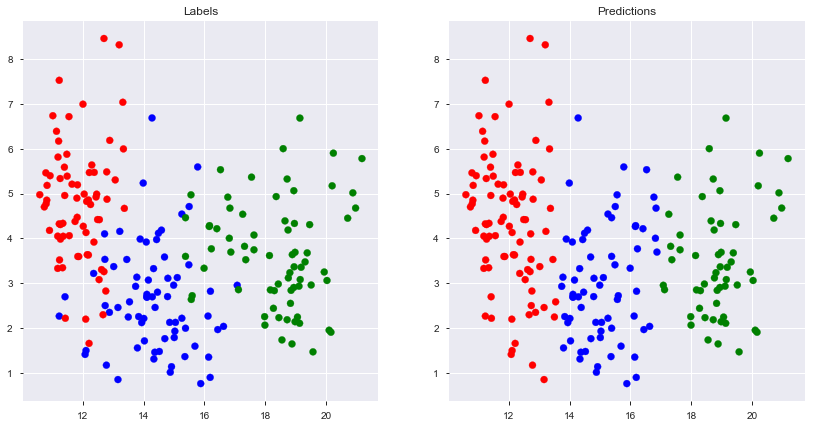

In [47]:
plt.figure(figsize=(14,7))
 
colormap = np.array(['red', 'green', 'blue'])
 
plt.subplot(1, 2, 1)
plt.scatter(seeds.area, seeds.asymmetry, c=colormap[seed_target])
plt.title('Labels')
 
plt.subplot(1, 2, 2)
plt.scatter(seeds.area, seeds.asymmetry, c=colormap[pred_binary])
plt.title('Prediсtions') 

In [48]:
print('Accuracy of clustering is ' + '{}{}'.format(round(100*sum(pred_binary == seed_target) / len(seed_target), 2), '%'))

Accuracy of clustering is 84.29%


use PCA to reduce dimensionality, to project data to a lower dimensional space. 

In [52]:
reduced_data = PCA(n_components=2).fit_transform(seeds.drop(['type'], axis=1))
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=10)
kmeans.fit(reduced_data) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

[[ 4.33639856  0.46609094]
 [-0.11491258 -1.08548863]
 [-3.32787801  0.64576148]]


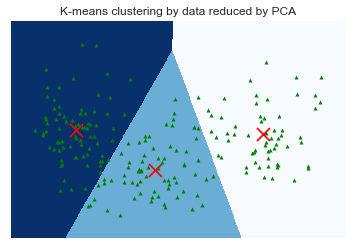

In [79]:
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Obtain labels for each point in mesh
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

#viz 
plt.figure(1)
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Blues,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'g^', markersize=4)

# Plot the centroids as a red X
centroids = kmeans.cluster_centers_ 
print(centroids) 
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=4,
            color='r') 

plt.title('K-means clustering by data reduced by PCA')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(()) 
plt.show() 

In [80]:
seeds_little = pd.concat([seeds[20:60],seeds[70:80],seeds[140:150]]) 

In [81]:
def scatter6d(x,y,z, color, colorsMap='summer'):
    cNorm = matplotlib.colors.Normalize(vmin=min(color), vmax=max(color))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=plt.get_cmap(colorsMap))
    fig = plt.figure()
    ax = Axes3D(fig)
    markers = ['s', 's','o','^']
    for i in seeds.type.unique():
        ax.scatter(x, y, z, c=scalarMap.to_rgba(color), marker=markers[i], s = seeds_little.asymmetry*50 )
    scalarMap.set_array(color)
    fig.colorbar(scalarMap,label='{}'.format('length'))
    plt.show() 

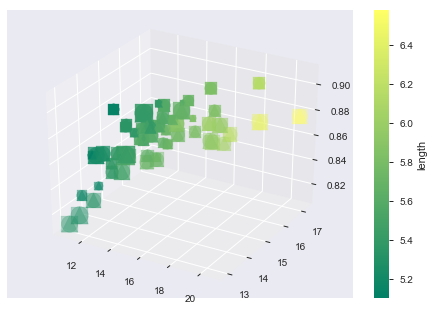

In [82]:
scatter6d(seeds_little.area, seeds_little.perimeter, seeds_little.compactness, seeds_little.length) 